In [1]:
import pandas as pd
import numpy as np
from glob import glob
import itertools
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csvfiles = glob('color_data/*.csv')
dataframes = []
labels = ['Black/gray', 'Blue', 'Brown', 'Green', 'Metal', 'Orange', 'Red',
          'Violet', 'White', 'Yellow']

for (csvfile, labels) in zip(csvfiles,labels):
    temp_df = pd.read_csv(csvfile, header=[0])
    temp_df.columns = temp_df.iloc[0]
    temp_df = temp_df[1:].reset_index(drop=True).drop(temp_df.columns[[0,2,5,6]], axis=1)
    temp_df['Color Type'] = labels
    
    dataframes.append(temp_df)
    
df = pd.concat(dataframes, ignore_index=True)

In [3]:
df.isnull().sum()

0
Color Name    14
R;G;B Dec      0
RGB Hex        0
Color Type     0
dtype: int64

In [4]:
df = df.dropna(subset=['Color Name']).reset_index(drop=True)
df

,Color Name,R;G;B Dec,RGB Hex,Color Type
0,Grey,84;84;84,545454,Black/gray
1,"Grey, Silver",192;192;192,C0C0C0,Black/gray
2,grey,190;190;190,BEBEBE,Black/gray
3,LightGray,211;211;211,D3D3D3,Black/gray
4,LightSlateGrey,119;136;153,778899,Black/gray
...,...,...,...,...
641,gold3,205;173;0,CDAD00,Yellow
642,gold4,139;117;0,8B7500,Yellow
643,Goldenrod,219;219;112,DBDB70,Yellow
644,Medium Goldenrod,234;234;174,EAEAAE,Yellow


(array([116., 125.,  41.,  72.,  14.,  51.,  72.,  68.,  39.,  48.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

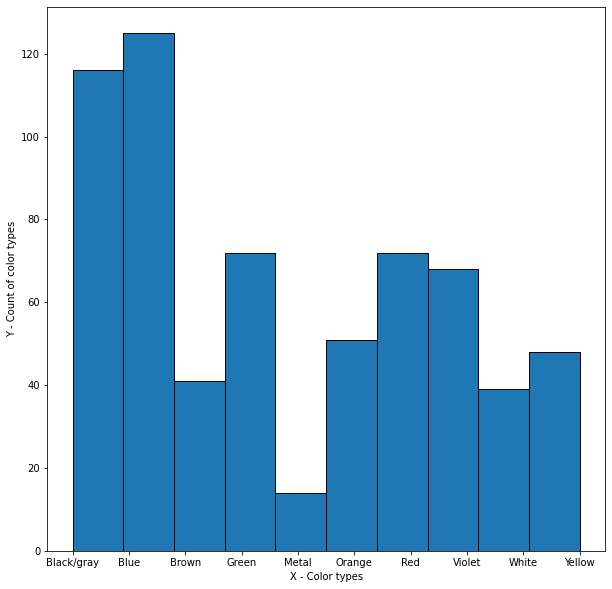

In [5]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.xlabel('X - Color types')
plt.ylabel('Y - Count of color types')
plt.hist(df['Color Type'], edgecolor = 'black')


In [6]:
classification = {
    'Black/gray' : 0,
    'Blue' : 1,
    'Brown' : 2,
    'Green' : 3,
    'Metal' : 4,
    'Orange' : 5,
    'Red' : 6,
    'Violet' : 7,
    'White' : 8,
    'Yellow' : 9
}

df = df.replace({'Color Type' : classification})

df

,Color Name,R;G;B Dec,RGB Hex,Color Type
0,Grey,84;84;84,545454,0
1,"Grey, Silver",192;192;192,C0C0C0,0
2,grey,190;190;190,BEBEBE,0
3,LightGray,211;211;211,D3D3D3,0
4,LightSlateGrey,119;136;153,778899,0
...,...,...,...,...
641,gold3,205;173;0,CDAD00,9
642,gold4,139;117;0,8B7500,9
643,Goldenrod,219;219;112,DBDB70,9
644,Medium Goldenrod,234;234;174,EAEAAE,9


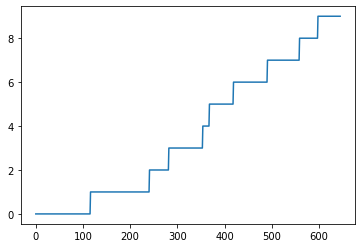

In [7]:
plt.plot(df['Color Type'])

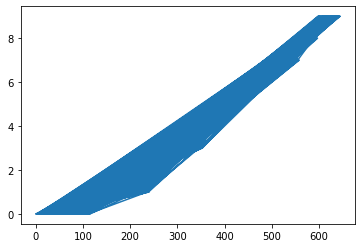

In [8]:
subdf_1 = df.sample(frac=1)
plt.plot(subdf_1['Color Type'])

In [9]:
data = df['R;G;B Dec'].str.split(';',expand=True).astype(int).values
target = df['Color Type']

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.20, shuffle=True, random_state=42)

### Results function

In [65]:
def model_results(fited_model, data_train, data_test, target_train, target_test):
    
    labels = [0,1,2,3,4,5,6,7,8,9]
    
    score = round(fited_model.score(data_test, target_test)*100, 2)
    target_pred = fited_model.predict(data_test)
    
    cf_matrix = confusion_matrix(target_test, target_pred)
    
    classification_results = classification_report(target_test.to_list(), target_pred, labels=labels)
    
    plt.figure(figsize=(15,8))
    
    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

    ax.set_title('Confusion Matrix\n\n')

    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')

    ticklabels = ['Black/gray', 'Blue', 'Brown', 'Green', 'Metal', 'Orange', 'Red',
                  'Violet', 'White', 'Yellow']
    ax.xaxis.set_ticklabels(ticklabels)
    ax.yaxis.set_ticklabels(ticklabels)
    
    print(classification_results, '\nScore obtained by the model:', score)
    
    return classification_results, score

### Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.84      0.93      0.88        28
           2       0.62      0.56      0.59         9
           3       1.00      0.56      0.71        18
           4       0.00      0.00      0.00         4
           5       0.33      1.00      0.50         4
           6       0.57      0.36      0.44        11
           7       0.82      0.64      0.72        14
           8       0.15      0.67      0.25         3
           9       0.44      0.44      0.44         9

    accuracy                           0.67       130
   macro avg       0.56      0.59      0.53       130
weighted avg       0.73      0.67      0.68       130
 
Score obtained by the model: 66.92


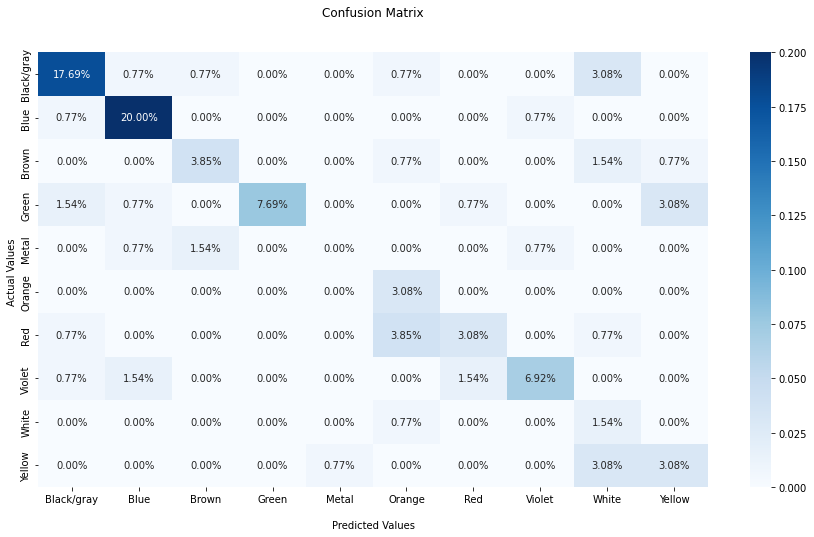

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=8, random_state=42).fit(data_train, target_train)

GradientBoostingClassifier_results, GradientBoostingClassifier_score = model_results(clf, data_train, data_test, target_train, target_test)

### Quadratic Discriminant Analysis

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()

clf.fit(data_train, target_train)

score = round(clf.score(data_test, target_test)*100, 2)
target_pred = clf.predict(data_test)

cf_matrix = confusion_matrix(target_test, target_pred)

labels = [0,1,2,3,4,5,6,7,8,9]

print(classification_report(target_test.to_list(), target_pred, labels=labels))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.87      0.96      0.92        28
           2       0.25      0.11      0.15         9
           3       1.00      0.67      0.80        18
           4       0.00      0.00      0.00         4
           5       0.20      0.50      0.29         4
           6       0.64      0.64      0.64        11
           7       1.00      0.79      0.88        14
           8       0.50      1.00      0.67         3
           9       0.62      0.89      0.73         9

    accuracy                           0.77       130
   macro avg       0.60      0.65      0.60       130
weighted avg       0.78      0.77      0.76       130



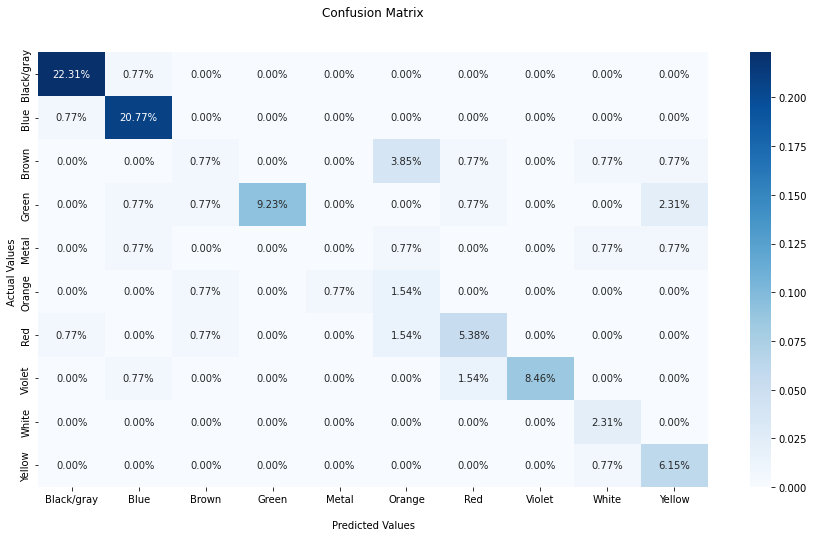

In [14]:
plt.figure(figsize=(15,8))

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ticklabels = ['Black/gray', 'Blue', 'Brown', 'Green', 'Metal', 'Orange', 'Red',
              'Violet', 'White', 'Yellow']
ax.xaxis.set_ticklabels(ticklabels)
ax.yaxis.set_ticklabels(ticklabels)

plt.show()

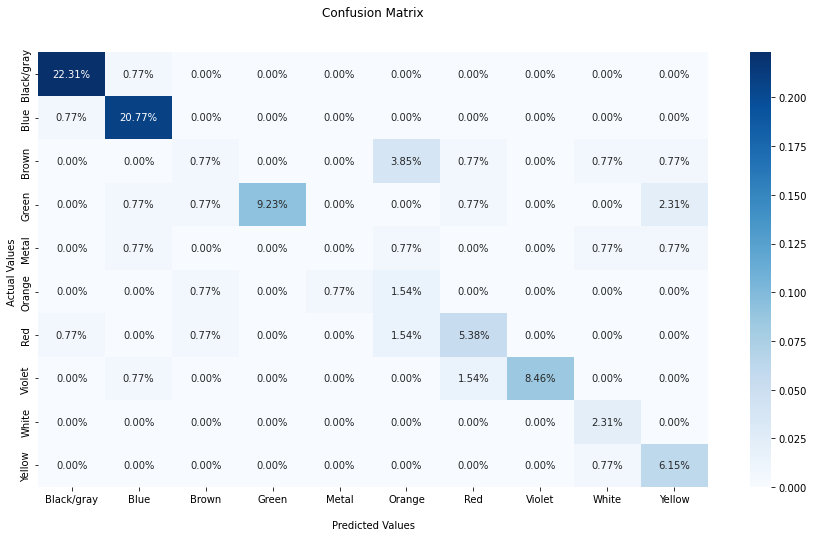